In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import joblib

sns.set(style="whitegrid")



In [27]:

df = pd.read_csv("diarrhea_dataset.csv")   # change filename if needed
df.head()



,age_months,sex,dehydration_grade,muac,prior_antibiotic_use,local_resistance_index,fever,vomiting,blood_in_stool,diarrhea_duration_baseline,treatment_given,outcome_benefit
0,39,Male,Severe,12.15,1,0.42,0,1,0,1,1,0
1,52,Female,Moderate,11.36,0,0.62,0,1,0,3,0,0
2,29,Female,Mild,12.36,1,0.25,0,0,1,3,1,1
3,15,Male,Mild,12.04,0,0.76,1,1,0,3,1,0
4,43,Male,NaN,11.08,0,0.24,0,1,0,4,1,0


In [28]:

print("Shape:", df.shape)

print("\nInfo:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())




Shape: (5000, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_months                  5000 non-null   int64  
 1   sex                         5000 non-null   object 
 2   dehydration_grade           3048 non-null   object 
 3   muac                        5000 non-null   float64
 4   prior_antibiotic_use        5000 non-null   int64  
 5   local_resistance_index      5000 non-null   float64
 6   fever                       5000 non-null   int64  
 7   vomiting                    5000 non-null   int64  
 8   blood_in_stool              5000 non-null   int64  
 9   diarrhea_duration_baseline  5000 non-null   int64  
 10  treatment_given             5000 non-null   int64  
 11  outcome_benefit             5000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 468.9+ KB
None



In [29]:

df.describe()


,age_months,muac,prior_antibiotic_use,local_resistance_index,fever,vomiting,blood_in_stool,diarrhea_duration_baseline,treatment_given,outcome_benefit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000
mean,30.125800,11.497542,0.292600,0.501750,0.413400,0.498200,0.14740,2.486600,0.40080,0.181000
std,16.910162,1.437047,0.455002,0.231921,0.492493,0.500047,0.35454,1.117887,0.49011,0.385057
min,1.000000,9.000000,0.000000,0.100000,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000
25%,16.000000,10.270000,0.000000,0.300000,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000
50%,30.000000,11.495000,0.000000,0.500000,0.000000,0.000000,0.00000,2.000000,0.00000,0.000000
75%,45.000000,12.720000,1.000000,0.710000,1.000000,1.000000,0.00000,3.000000,1.00000,0.000000
max,59.000000,14.000000,1.000000,0.900000,1.000000,1.000000,1.00000,4.000000,1.00000,1.000000


In [30]:


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))



Numeric Columns: ['age_months', 'muac', 'prior_antibiotic_use', 'local_resistance_index', 'fever', 'vomiting', 'blood_in_stool', 'diarrhea_duration_baseline', 'treatment_given', 'outcome_benefit']
Categorical Columns: ['sex', 'dehydration_grade']


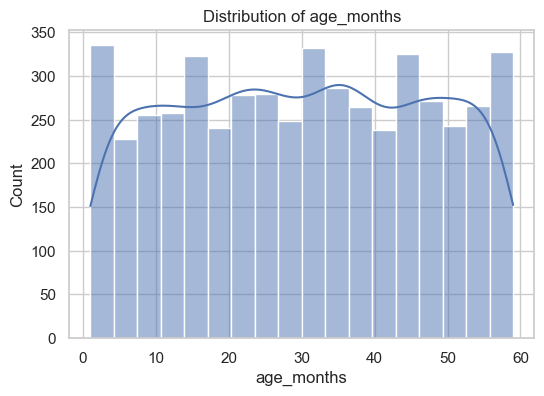

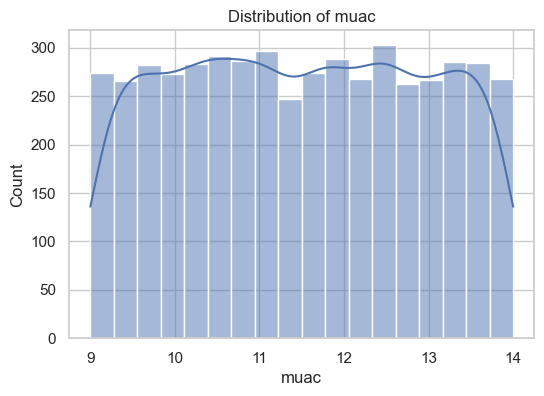

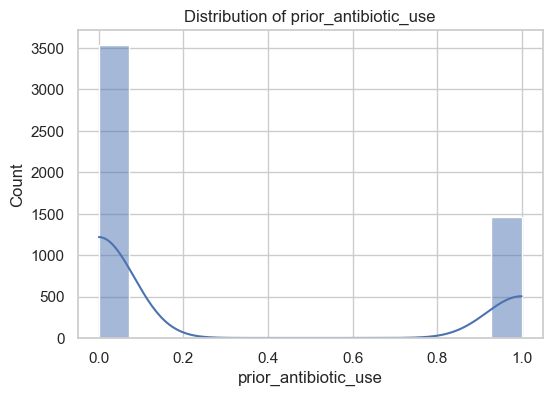

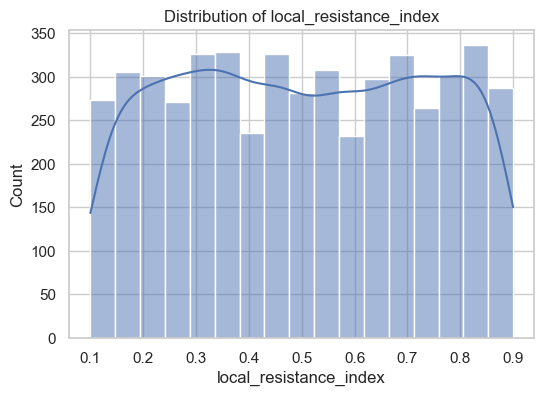

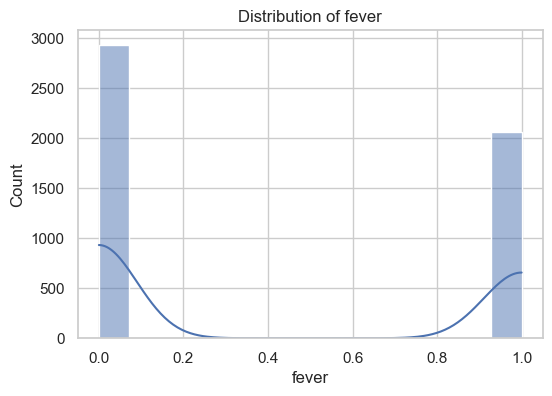

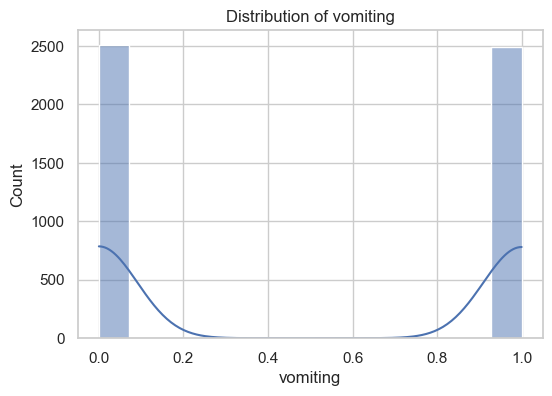

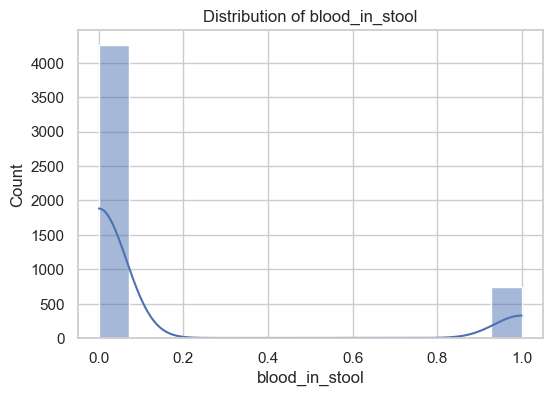

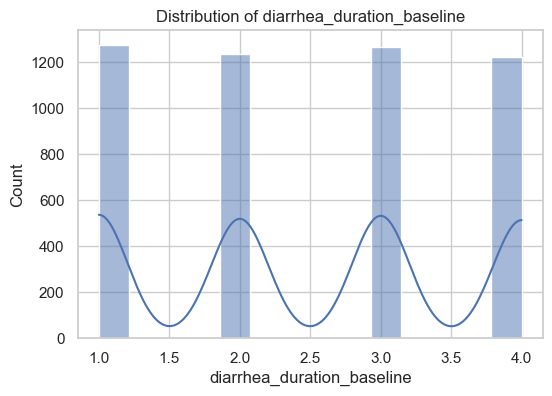

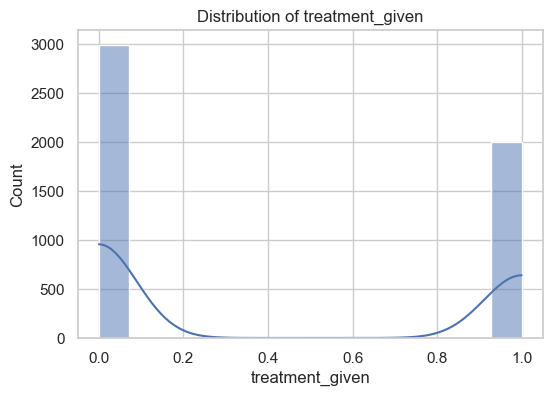

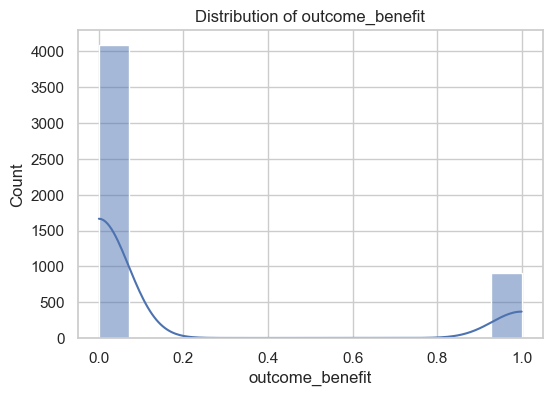

In [31]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()



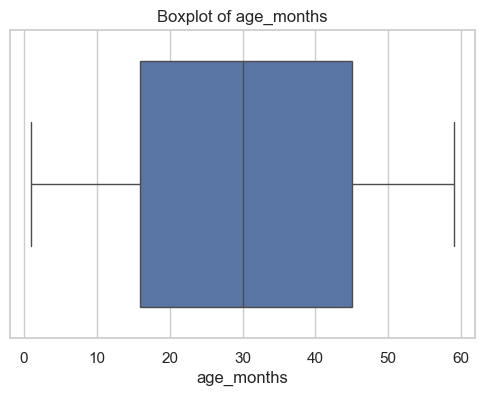

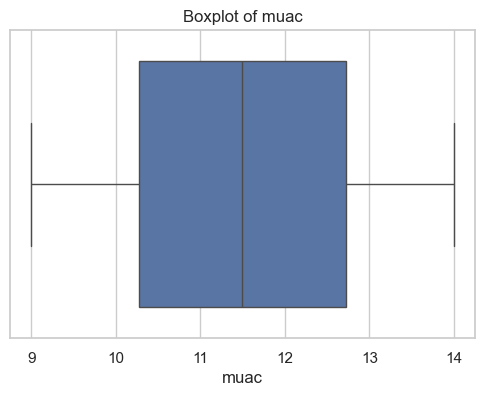

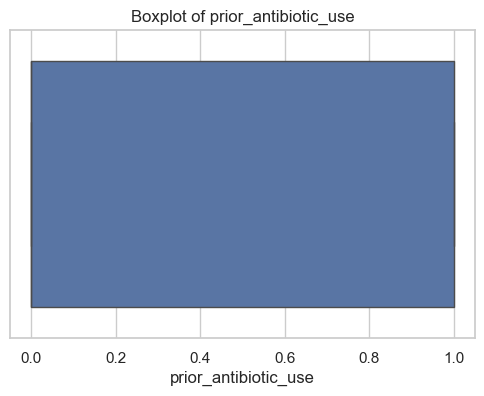

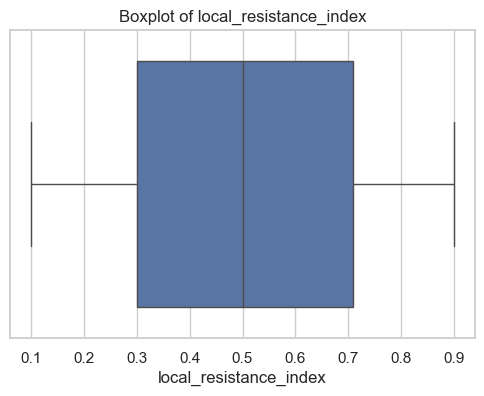

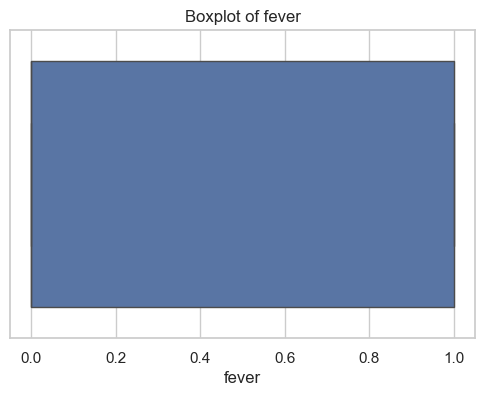

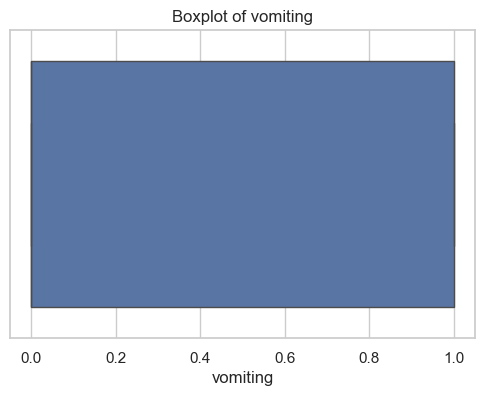

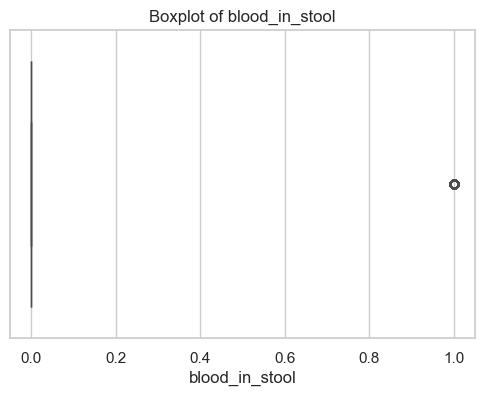

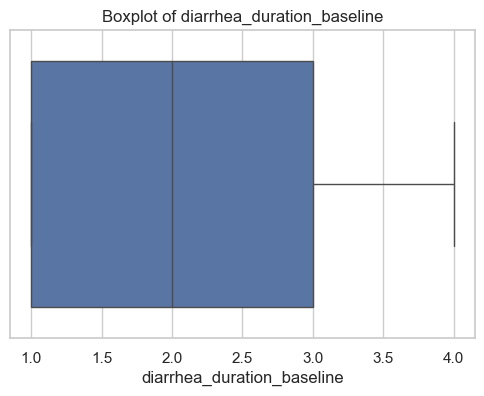

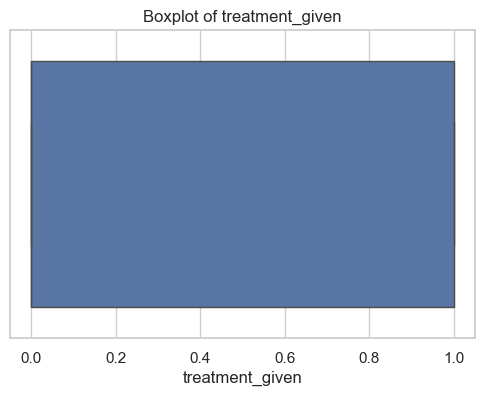

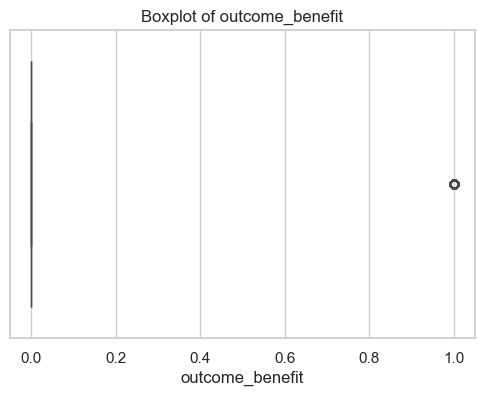

In [32]:

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


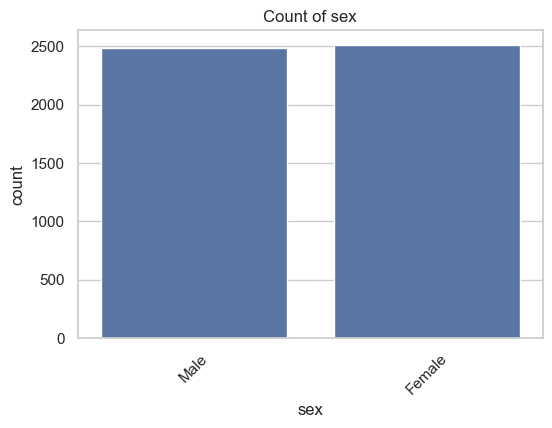

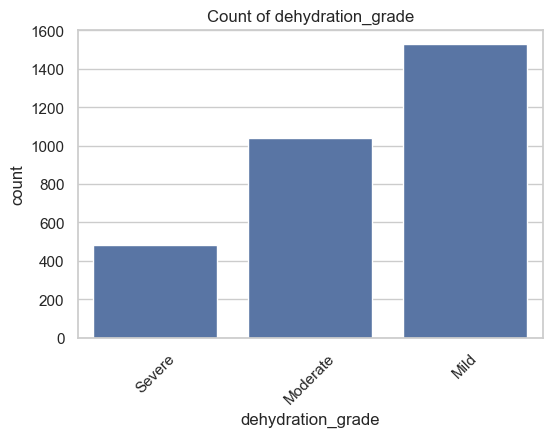

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()




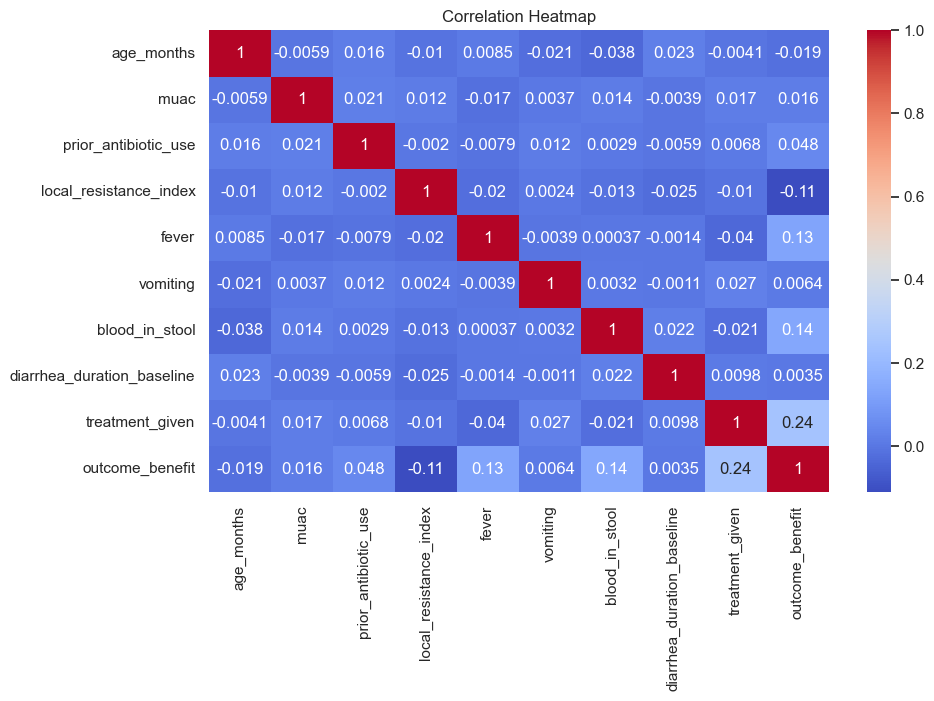

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



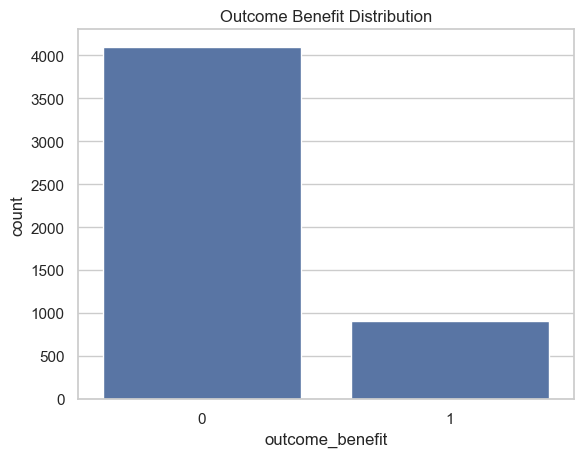

In [35]:
sns.countplot(x=df["outcome_benefit"])
plt.title("Outcome Benefit Distribution")
plt.show()



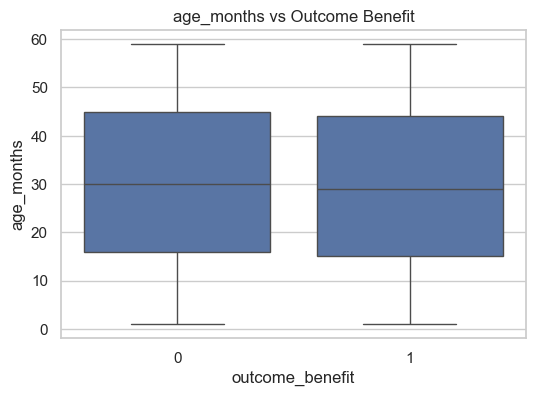

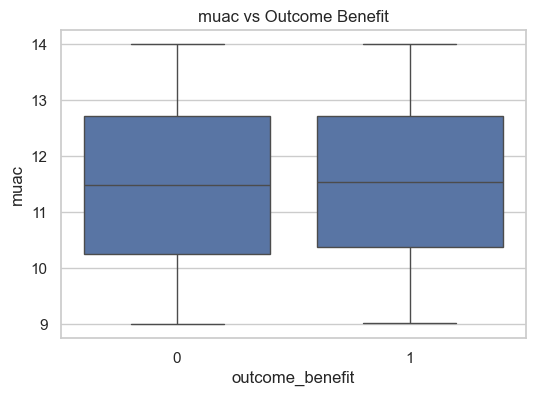

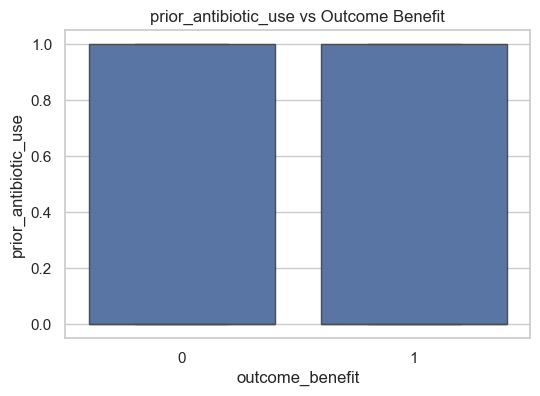

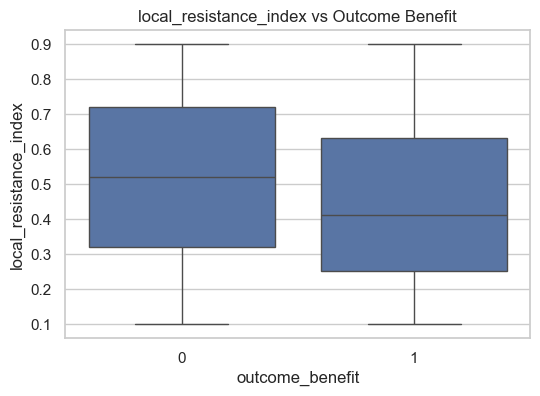

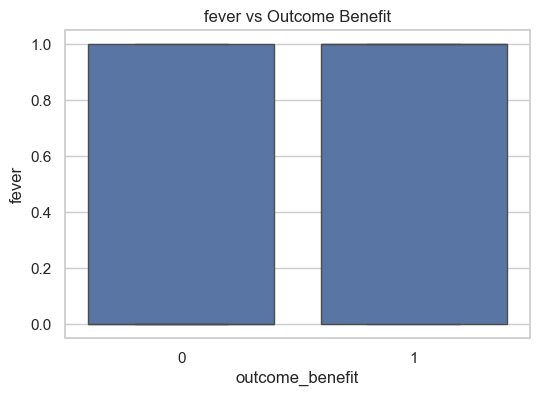

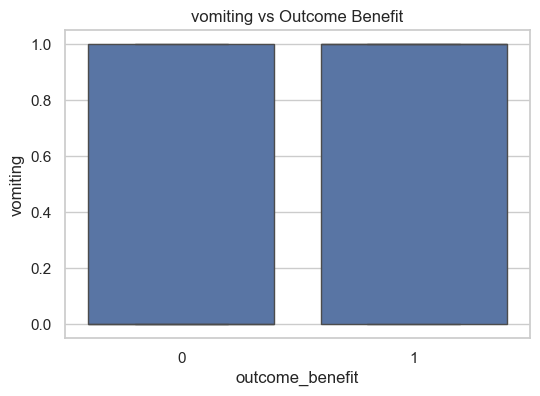

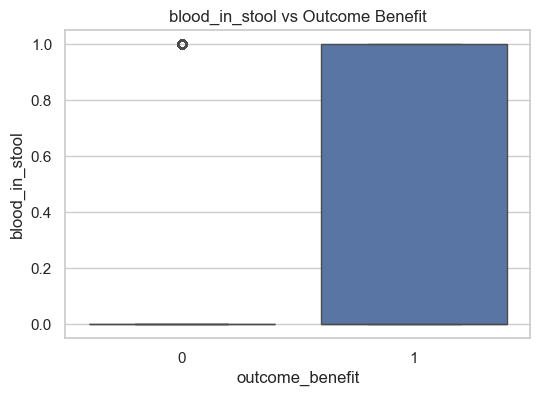

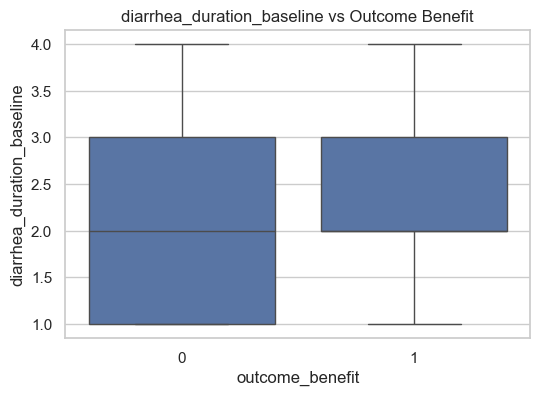

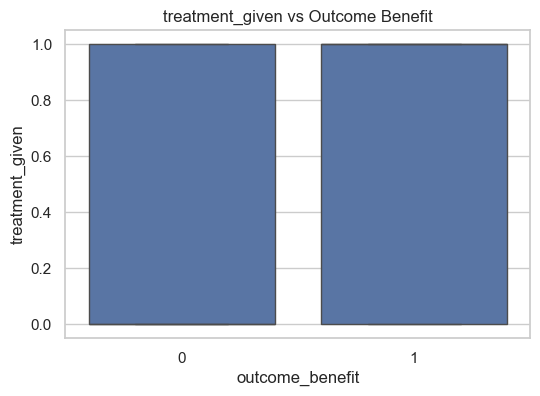

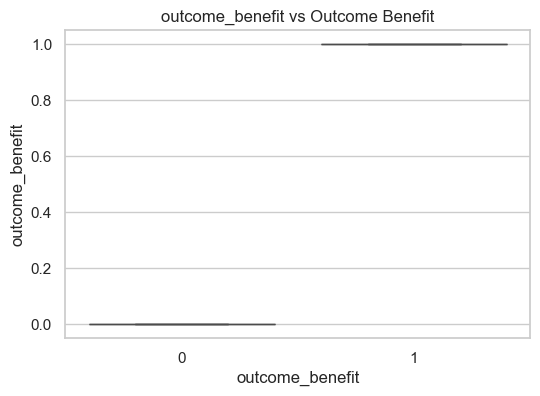

In [36]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["outcome_benefit"], y=df[col])
    plt.title(f"{col} vs Outcome Benefit")
    plt.show()



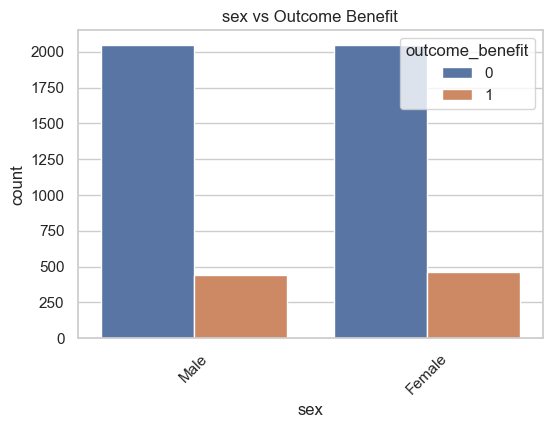

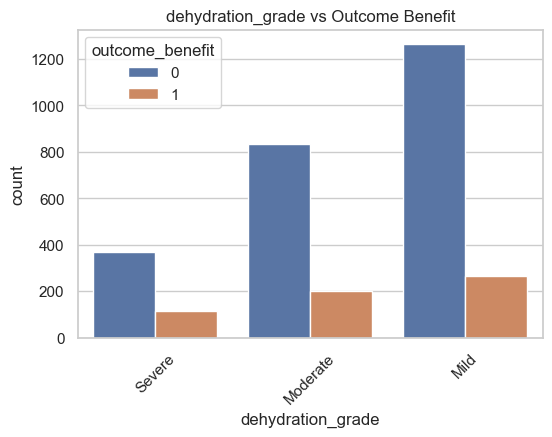

In [37]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df["outcome_benefit"])
    plt.title(f"{col} vs Outcome Benefit")
    plt.xticks(rotation=45)
    plt.show()



In [38]:
X = df.drop("outcome_benefit", axis=1)
y = df["outcome_benefit"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [39]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)



In [40]:
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", LogisticRegression(max_iter=1000))
])



In [41]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age_months', 'muac', 'prior_antibiotic_use', 'local_resistance_index',
       'fever', 'vomiting', 'blood_in_stool', 'diarrhea_duration_baseline',
       'treatment_given'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'dehydration_grade'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [42]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]



In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", auc)


Accuracy: 0.815

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.90       819
           1       0.42      0.06      0.10       181

    accuracy                           0.81      1000
   macro avg       0.62      0.52      0.50      1000
weighted avg       0.75      0.81      0.75      1000


ROC-AUC Score: 0.7424901679045325


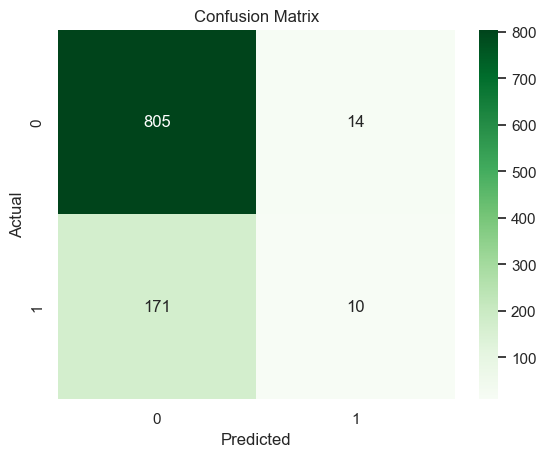

In [44]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


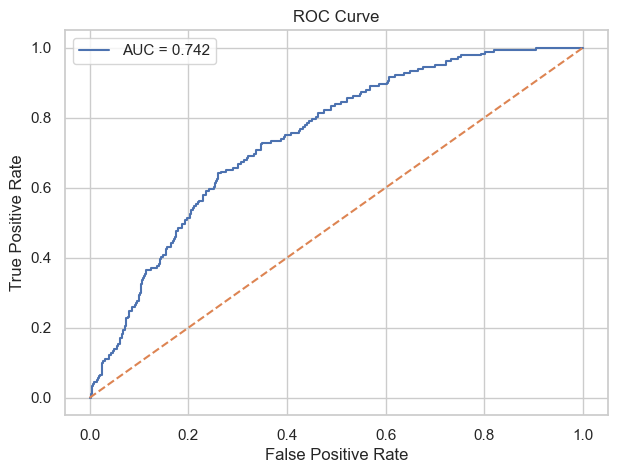

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [46]:
joblib.dump(model, "model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [48]:
import sklearn
print(sklearn.__version__)


1.6.1
